legi: 20-945-796

# SLT-CE-2: Deterministic Annealing

### References

<ol>
<li> Sections II.A.1 (principled derivation of deterministic annealing) and II.A.3 (Mass-constrained clustering) of 'Deterministic annealing for clustering, compression, classification, regression, and related optimization problems', Kenneth Rose, 1998, http://ieeexplore.ieee.org/document/726788/ 
</li>

<li>
The wine data set, http://www3.dsi.uminho.pt/pcortez/wine5.pdf
</li>
    
</ol>

### Setup 

In [3]:
import sklearn as skl
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import sklearn.svm as svm
from sklearn import cluster

import pandas as pd
import numpy as np
from treelib import Tree

import matplotlib.pyplot as plt
from matplotlib import cm

<h2 style="background-color:#f0b375;">
Section 4.0
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 4.0 </span>
</h2>

<p style="background-color:#adebad;">
    For this exercise, it is of utmost importance to read reference [1] about deterministic annealing clustering (DAC). Our implementation will be based on this reference. Please shortly summarize what they refer to as the <i>preferred implementation</i> of the DAC algorithm.
</p>

The 'preferred implementation' of the DA Clustering algorithm incorporates the mass-constrained approach and a sketch of the algorithm is as follows: <br>
1) Set Limits: number of codevectors $K_{max}$, minimum temperature $T_{min}$ <br>
2) Initialize: T>2$\lambda_{max}(C_x)$, K=1,  $y_1 = \sum_x xp(x)$, and $p(y_1)=1$ <br>
3) Update for $i=1,...,K$<br>
> $y_i = \frac{\sum_x xp(x)p(y_i|x)}{p(y_i)}$ <br>
> where   $p(y_i|x) = \frac{p(y_i)e^{-(x-y_i)^2/T}}{\sum_{j=1}^K p(y_j)e^{-(x-y_i)^2/T}}$ <br>
> and $p(y_i) = \sum_x p(x)p(y_i|x)$

4) Convergence Test: if not satisfied go to step (3).<br>
5) If $T \leq T_min$ perform last iteration with T$\rightarrow$0 and stop.<br>
6) Cooling Step: T $\leftarrow$ $\alpha$T ($\alpha < 1$)<br>
7) If $K<K_max$ check condition for phase transition for $i=1,...,K$. If critical temperature T is reached for a cluster j, then add a new codevector $y_{K+1} = y_j + \delta$, $p(y_{K+1}) = p(y_j)/2$, $p(y_j) \leftarrow p(y_j)/2$, and increment K.<br>
8) Go to step (3)<br>

<p style="background-color:#adebad;">
    In order to avoid headaches with numerical instabilities, we first try our algorithm on a simple artificially generated data as below. Run the bloc below to have a look at the data. Later when we have everything implemented, we will examine some real world data. 
</p>

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Text(0.5, 1.0, 'Test data')

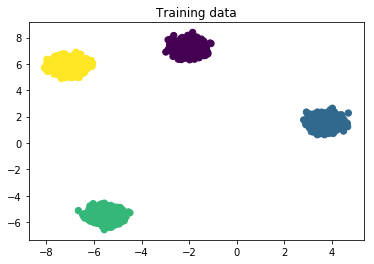

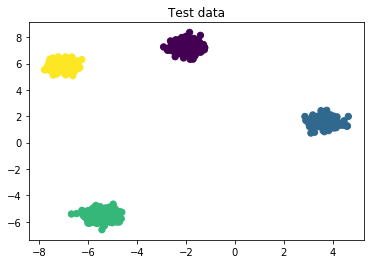

In [102]:
n_clusters = 4
ran_s = 42

# Generate artificial dataset
X, y_true = make_blobs(n_samples=7000, centers=4,
                       cluster_std=0.3, random_state=ran_s,
                       center_box=(-8.0, 8.0),
                       shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_true, train_size=6000, random_state=42)

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap='viridis')
plt.title("Training data")

plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap='viridis')
plt.title("Test data")

<p style="background-color:#adebad;">
    Implement the <b>fit method</b> for the template class DeterministicAnnealing, according to the contract outlined in its docstring. (The template class DeterministicAnnealing is in file <b>DA.py</b> which you can open in your favourite IDE) For the implementation, it may help to take a look at both <b>get_distance method</b> and <b>fit _calculate_cluster_probs method</b> and implement them as well. Of course you are free to change all these methods or/and write additional methods for your purpose.
    You can add more class methods as necessary.
    See http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for complementary information.
</p>
<p style="background-color:#adebad;">
    While implementing, you can run the bloc below to test your implementation.
</p>

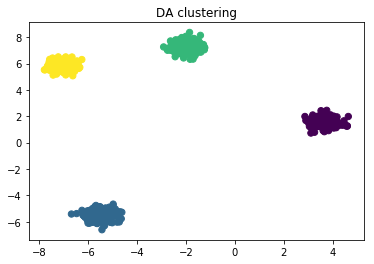

In [103]:
from DA import DeterministicAnnealingClustering

DAC = DeterministicAnnealingClustering(
    n_clusters=n_clusters, random_state=ran_s)
DAC.fit(X_train)
y_DAC = DAC.predict(X_test)
y_DAC_hard = np.argmax(y_DAC, axis=1)
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_DAC_hard, s=40, cmap='viridis')
plt.title("DA clustering")
plt.show()

<h2 style="background-color:#f0b375;">
Section 4.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points. Note that you can have a maximum of 6 points at the end.</span>
</h2>

<p style="background-color:#adebad;">
    In this section we implement a plot which will help us better understand the DA method, and could also be a help for better debugging of your implementation.
    
 <ul style="background-color:#adebad;">
        <li> 
            Modify your implementation of <b>fit</b> function such that <b>plot_phase_diagram</b> method will produce a plot similar to the phase diagram plot shown in Figure 2 of the reference paper.
        </li>
</ul>  
</p>

<ul style="background-color:#adebad;">
            For this, extend DAC.fit to save the expected distortion during annealing as an additional attribute self.distortion.
            You might also want to save the number of effective clusters and the temperature along the way.
    </ul>
</p>

#### extend DAC.fit(self, X):
    # ...
    # Save information for each (n-th) annealing step:
    # self.distortion = [d0, d1, d2, ...]
    # self.n_eff_clusters = [e0, e1, e2, ...]
    # self.temp = [t0, t1, t2, ...]
    # ...

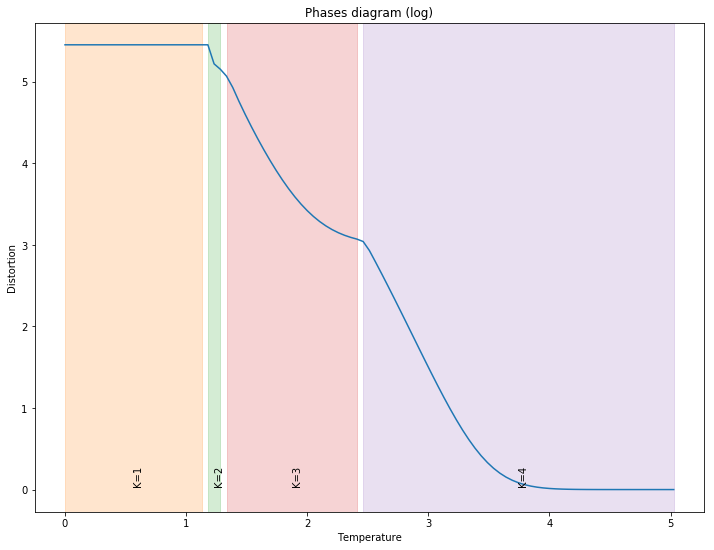

In [104]:
DAC.plot_phase_diagram()

<h2 style="background-color:#f0b375;">
Section 5.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
Here we implement another plot which helps better undetrstad the dynamics of the algorithm.
        <li>
        Implement DAC.plot_bifurcation, which should create a bifurcation plot.<br>
        Modify DAC.fit to keep track of the distances, using the tree object DAC.bifurcation_tree. When a cluster splits, it creates two child nodes. Each node should store its centroid vector, and the distance to the parent centroid vector. After splitting, the parent node is not updated anymore.<br>
        In the bifurcation plot, the horizontal distance of a child node to its parent node should be exactly the distance to the parent centroid vector. The two child nodes should move in opposite directions, i.e. one to the left of the parent and one to the right.
        </li>
</ul>

This section could bit a bit annoying, you can also jump to the next sections and come back here later. 

beta [0.006359303764370106, 0.006694003962494849, 0.007046319960520894, 0.0074171789058114675, 0.007807556742959439, 0.008218480782062568, 0.008651032402171126, 0.00910634989702224, 0.009585631470549725, 0.010090138390052343, 0.010621198305318257, 0.011180208742440271, 0.011768640781516076, 0.012388042927911659, 0.013040045187275431, 0.01372636335502677, 0.014448803531607126, 0.015209266875375924, 0.016009754605658868, 0.0168523732691146, 0.01773934028327853, 0.018672989771872137, 0.019655778707233826, 0.020690293376035607, 0.021779256185300643, 0.022925532826632254, 0.02413213981750764, 0.025402252439481725, 0.02673921309419129, 0.02814654009914873, 0.029627936946472345, 0.03118730204891826, 0.03282873899886133, 0.03455656736722245, 0.036375334070760476, 0.03828982533764261, 0.040305079302781696, 0.042426399266086004, 0.04465936764851158, 0.04700986068264377, 0.04948406387646713, 0.05208848829101803, 0.054829987674755824, 0.05771577649974297, 0.06075344894709787, 0.06395099889168196, 

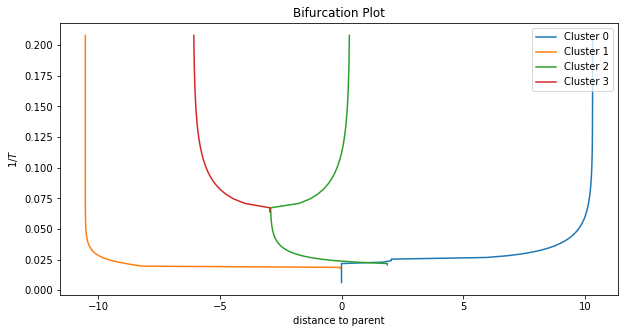

In [105]:
DAC.plot_bifurcation()

<h2 style="background-color:#f0b375;">
Section 5.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>

<p style="background-color:#adebad;">
Now we are ready to use some real world data. This might need some tweaking and handling of numberical instabilities. Please make sure your understand the data.
</p>

<p style="background-color:#adebad;">
Read the wine data [3], which contains 11 physiochemical attributes, and two labels (quality and color).
</p>

<p style="background-color:#adebad;">
    Create an instance of your DAC class with n_clusters = 2 and <b>fit the first 6000 samples</b> of the wine data set. Record the execution time. Furthermore, create an instance of the sklearn k-means class, and fit it with the same parameters. Again record the execution time. Make sure that the hyper parameters (initial temperature, min temperature, convergence criteria, noise, etc.) make sense and lead to a reasonable clustering
</p>

In [4]:
from DA import read_data_csv
from DA import DeterministicAnnealingClustering
X, y = read_data_csv("wine-data.csv", y_names=["quality", "color"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y["color"], train_size=6000, random_state=42)

FileNotFoundError: File b'wine-data.csv' does not exist

In [85]:
%%time
DAC = DeterministicAnnealingClustering(n_clusters=2, random_state=42, T_min=200, convergence_threshold=0.1, eps_T=200)
DAC.fit(X_train)

CPU times: user 6min 28s, sys: 3.19 s, total: 6min 31s
Wall time: 2min 37s


In [86]:
%%time
kmeans = cluster.KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train)

CPU times: user 310 ms, sys: 4.11 ms, total: 314 ms
Wall time: 80.2 ms


In [87]:
%%time
y_kmeans = kmeans.predict(X_test)

CPU times: user 5.88 ms, sys: 1.25 ms, total: 7.13 ms
Wall time: 1.65 ms


In [88]:
%%time
y_DAC = DAC.predict(X_test)

CPU times: user 101 ms, sys: 1.17 ms, total: 102 ms
Wall time: 25.6 ms


<h2 style="background-color:#f0b375;">
Section 6.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
<li> Before we can compute the confusion matrix, we need to perform some post-processing on the DAC cluster assignments.
    Explain what the function postprocess (defined below) does, and why we need it. To do so, complete the docstring of the function postprocess.
        </li>
</ul>

In [1]:
def postprocess(y_DAC, y_kmeans):
    """Since the clusters' centroids found by DAC and Kmeans may correspond to different labels
    it is necessary to create a map from the DAC labels to the Kmeans labels.
    To achieve so this method finds the closest data point to each cluster found by DAC and 
    computes its label according to kmeans. This map is stored in dac2kmeans, which is later used
    to convert dac labels into kmeans labels."""
    
    # computes hard cluster assignments by selecting the cluster with max probability
    # between the two available for each sample.
    y_DAC_hard = np.argmax(y_DAC, axis=1)
    print(y_DAC_hard)
    
    # computes the number of unique/different clusters
    n_clusters = len(np.unique(y_DAC_hard))
    dac2kmeans = []
    for cluster in range(n_clusters):
        # returns the index of the sample/row that maximizes a single entry, i.e. the sample with the highest
        # probability to be assigned to the given cluster
        argmax = np.argmax(y_DAC[:, cluster])
        #appends the label given by kmeans to the argmax index sample
        dac2kmeans.append(y_kmeans[argmax])
    print(dac2kmeans)  
    y_DAC_new = []
    for dac_label in y_DAC_hard:
        y_DAC_new.append(dac2kmeans[dac_label])
        
    return np.array(y_DAC_new)

In [2]:
skl.metrics.confusion_matrix(y_kmeans, postprocess(y_DAC, y_kmeans))

NameError: name 'skl' is not defined

</h2>

<ul style="background-color:#adebad;">
        <li> Read the docstring of <b>transform method</b> and understand what it does.
        </li>
        <li>
        Use DAC.transform and kmeans.transform to transform both, X_train and X_test. 
        </li>
       
</ul>

In [91]:
X_train_DAC = DAC.transform(X_train)
X_test_DAC = DAC.transform(X_test)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

<ul style="background-color:#adebad;">
        <li>
        Fit an SVM classifier with default parameters to the untransformed data, and to the transformed data.
        Compare the performance of predicting whether the color of a wine is red or white.
        </li>
    </ul>

In [92]:
svm_classifier = svm.SVC(random_state=42) #changed the model name otherwise did not work
svm_classifier.fit(X_train, y_train)
svm_classifier.score(X_test, y_test)

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9436619718309859

In [93]:
svm_DAC = svm.SVC(random_state=42)
svm_DAC.fit(X_train_DAC, y_train)
svm_DAC.score(X_test_DAC, y_test)

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9114688128772636

In [94]:
svm = svm.SVC(random_state=42)
svm.fit(X_train_kmeans, y_train)
svm.score(X_test_kmeans, y_test)

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9094567404426559

<ul style="background-color:#adebad;">
        <li>
        Produce two scatter plots, one for X_train_DAC and one for X_train_kmeans.<br>
        Make the marker color indicate the wine color.
        </li>
    </ul>

(6000, 2)
(6000, 2)


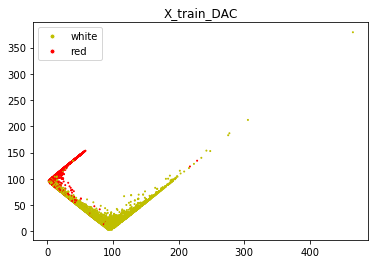

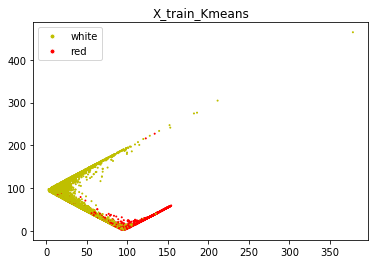

In [95]:
from matplotlib.lines import Line2D
#added for visualization
print(X_train_DAC.shape)
print(X_train_kmeans.shape)
y_train_rgb = y_train.copy().flatten()
y_train_rgb[y_train_rgb == 'white'] = 'y'
y_train_rgb[y_train_rgb == 'red'] = 'r'

plt.figure()
plt.scatter(X_train_DAC[:,0], X_train_DAC[:, 1], c=y_train_rgb, s=1, cmap='viridis')
plt.title("X_train_DAC")
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='y', markersize=5),
                   Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='r', markersize=5)]
plt.legend(legend_elements, ['white', 'red'])
plt.show()

plt.figure()
plt.scatter(X_train_kmeans[:,0], X_train_kmeans[:, 1], c=y_train_rgb, s=1)
plt.title("X_train_Kmeans")
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='y', markersize=5),
                   Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='r', markersize=5)]
plt.legend(legend_elements, ['white', 'red'])
plt.show()

<ul style="background-color:#adebad;">
    <li>
        Create a fixed 2D embedding (e.g. with LLE, t-SNE, MDS) of the wine data and color the markers according to quality and color. Fit and transform X_train with DAC(n_clusters=2,3,4,5,6,7,8,...). Produce a plot of the SVM score svm_DAC.score(X_test_DAC, y_test) as a function of n_clusters.. Each time use marker shapes to display the cluster memberships, and compare to the labels color and quality.
    </li>
</ul>

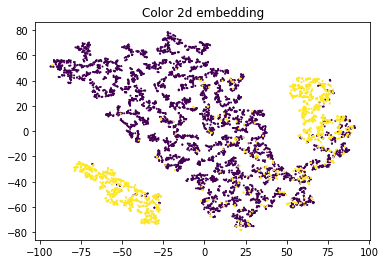

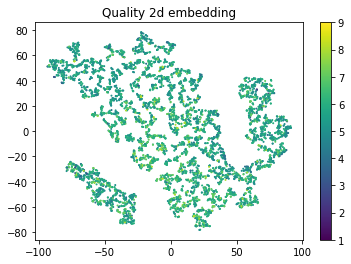

CPU times: user 52.5 s, sys: 2.57 s, total: 55 s
Wall time: 53.7 s


In [3]:
%%time
from sklearn.manifold import TSNE

# dataset 2d t-sne embedding 
tsne = TSNE(n_components = 2, random_state=42)
tsne_emb= tsne.fit_transform(X)
y_color_rgb = y["color"].copy().flatten()
y_color_rgb[y_color_rgb == 'white'] = 0
y_color_rgb[y_color_rgb == 'red'] = 1

# plot Color 2d embedding
plt.scatter(tsne_emb[:,0], tsne_emb[:,1], c=y_color_rgb, s=1, cmap='viridis')
plt.title("Color 2d embedding")
#plt.legend()
plt.show()

# plot Quality 2d embedding
plt.scatter(tsne_emb[:,0], tsne_emb[:,1], c=y["quality"].flatten(), s=1, cmap='viridis')
plt.title("Quality 2d embedding")
plt.colorbar()
#plt.legend()
plt.show()

In [3]:
from sklearn.manifold import TSNE
# 2d embedding of X_test
tsne = TSNE(n_components = 2, random_state=42)
tsne_emb_test= tsne.fit_transform(X_test)

y_test_color_rgb = y_test.copy().flatten() #y_test contains only the color
y_test_color_rgb[y_test_color_rgb == 'white'] = 'y'
y_test_color_rgb[y_test_color_rgb == 'red'] = 'r'

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


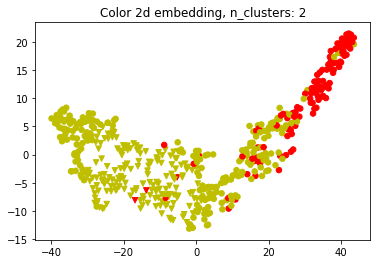

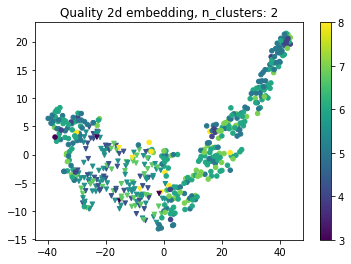

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/riccardodesanti/Desktop/LearningTheory/slt-coding-exercises-21/DA.py:250: RuntimeWarning: invalid value encountered in double_scalars
  cluster_probs[j, i] = self.marginal_probs[i] * np.exp(-dist_mat[j, i] / temperature) / normalizer


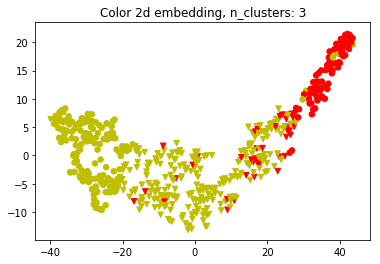

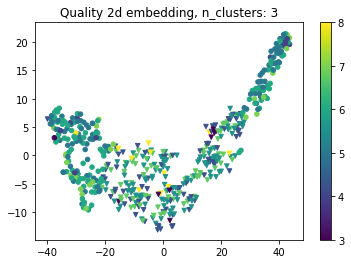

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/riccardodesanti/Desktop/LearningTheory/slt-coding-exercises-21/DA.py:250: RuntimeWarning: invalid value encountered in double_scalars
  cluster_probs[j, i] = self.marginal_probs[i] * np.exp(-dist_mat[j, i] / temperature) / normalizer


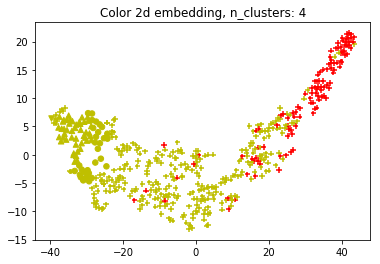

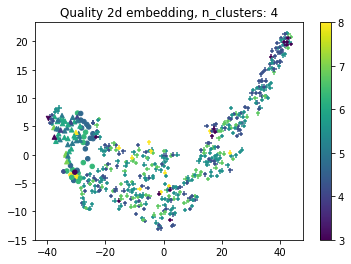

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/riccardodesanti/Desktop/LearningTheory/slt-coding-exercises-21/DA.py:250: RuntimeWarning: invalid value encountered in double_scalars
  cluster_probs[j, i] = self.marginal_probs[i] * np.exp(-dist_mat[j, i] / temperature) / normalizer


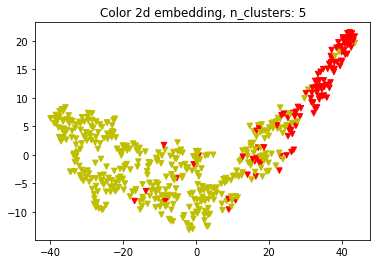

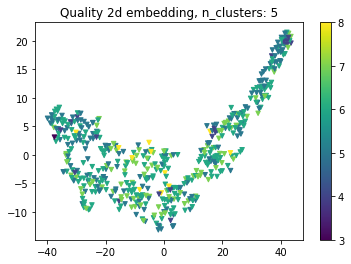

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/riccardodesanti/Desktop/LearningTheory/slt-coding-exercises-21/DA.py:250: RuntimeWarning: invalid value encountered in double_scalars
  cluster_probs[j, i] = self.marginal_probs[i] * np.exp(-dist_mat[j, i] / temperature) / normalizer


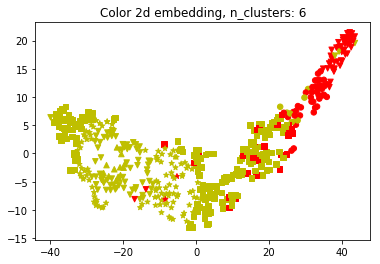

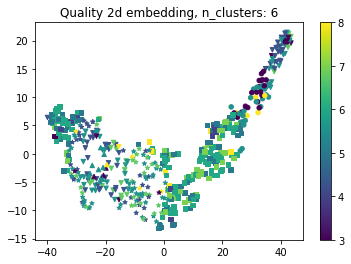

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/riccardodesanti/Desktop/LearningTheory/slt-coding-exercises-21/DA.py:250: RuntimeWarning: invalid value encountered in double_scalars
  cluster_probs[j, i] = self.marginal_probs[i] * np.exp(-dist_mat[j, i] / temperature) / normalizer


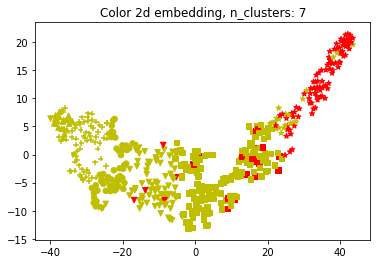

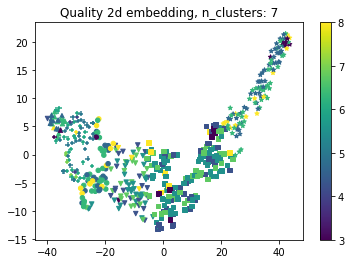

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/riccardodesanti/Desktop/LearningTheory/slt-coding-exercises-21/DA.py:250: RuntimeWarning: invalid value encountered in double_scalars
  cluster_probs[j, i] = self.marginal_probs[i] * np.exp(-dist_mat[j, i] / temperature) / normalizer


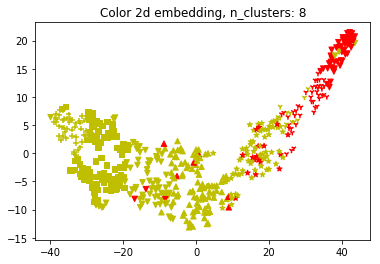

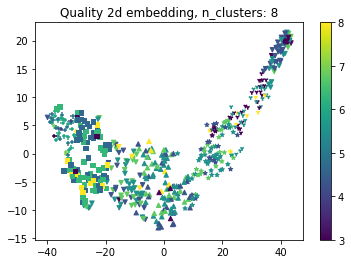

In [4]:
markers = ["v", "o", "^", "+", "s", "*", "x", "1"]
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X, y["quality"], train_size=6000, random_state=42)
for i in range(2,9):
    x_data = tsne_emb_test[:,0]
    y_data = tsne_emb_test[:,1]
    
    # Color and Quality prediction comparison wrt the maximum number of clusters (n_clusters)
    DAC = DeterministicAnnealingClustering(n_clusters=i, random_state=42, T_min=200, convergence_threshold=0.1, eps_T=200)
    DAC.fit(X_train)
    X_train_DAC = DAC.transform(X_train)
    X_test_DAC = DAC.transform(X_test) #embedding should be of X_test_DAC or X_test
    svm_DAC = svm.SVC(random_state=42)
    svm_DAC.fit(X_train_DAC, y_train)
    y_DAC = DAC.predict(X_test_DAC)
    y_DAC_hard = np.argmax(y_DAC, axis=1)
    
    # groud truth color (point color), cluster membership (point marker)
    fig, ax = plt.subplots()
    for j in range(i):
        ax.scatter(x_data[y_DAC_hard == j], y_data[y_DAC_hard == j], c=y_test_color_rgb[y_DAC_hard == j], marker=markers[j], s=30)
    plt.title("Color 2d embedding, n_clusters: " + str(i))
    #plt.legend()
    plt.show()
    
    # groud truth quality (point color), cluster membership (point marker)
    fig, ax = plt.subplots()
    y_test_quality_f = y_test_quality.flatten()
    for j in range(i):
        ax.scatter(x_data[y_DAC_hard == j], y_data[y_DAC_hard == j], c=y_test_quality_f[y_DAC_hard == j], marker=markers[j], s=20, cmap='viridis')
    plt.title("Quality 2d embedding, n_clusters: " + str(i))
    m = cm.ScalarMappable(cmap='viridis')
    m.set_array(y_test_quality)
    plt.colorbar(m)
    #plt.legend()
    plt.show()

/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


i: 2
score 0.9114688128772636


/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


i: 3
score 0.9074446680080482


/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


i: 4
score 0.9114688128772636


/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


i: 5
score 0.9074446680080482


/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


i: 6
score 0.9114688128772636


/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


i: 7
score 0.9094567404426559


/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riccardodesanti/opt/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


i: 8
score 0.9074446680080482
[0.9114688128772636, 0.9074446680080482, 0.9114688128772636, 0.9074446680080482, 0.9114688128772636, 0.9094567404426559, 0.9074446680080482]


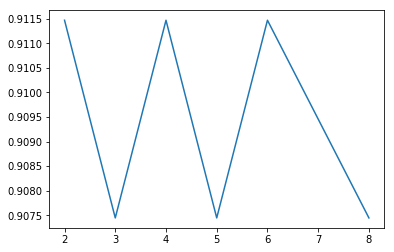

In [15]:
# SVM_DAC score as a function of max number of clusters
scores = []
num_clusters = []
for i in range(2,9):
    DAC = DeterministicAnnealingClustering(n_clusters=i, random_state=42, T_min=200, convergence_threshold=0.1, eps_T=200)
    DAC.fit(X_train)
    X_train_DAC = DAC.transform(X_train)
    X_test_DAC = DAC.transform(X_test)
    svm_DAC = svm.SVC(random_state=42)
    svm_DAC.fit(X_train_DAC, y_train)
    score = svm_DAC.score(X_test_DAC, y_test)
    scores.append(score)
    num_clusters.append(i)
    print('i:', i)
    print('score', score)
print(scores)

plt.plot(num_clusters, scores)


<ul style="background-color:#adebad;">
        <li>
            So far, our implementation of DAC assumed that our data is compatible with the euclidian metric. Argue why this assumption is not justified for the wine-data. Suggest a better alternative (no implementation required!).
        </li>
    </ul>
</p>



The euclidean distance is not invariant w.r.t. scale, as a consequence, if different features of the dataset show different value scales then the euclidean distance fails to integrate these features in a meaningful way. In particular, high relative distances in small scales will not contribute sufficiently to the distance measure. As a consequence some features may become almost irrelevant to the learning problem. To solve this issue it is sufficient to consider a distance measure that trasforms the features' values s.t. they all have the same scale, i.e. a normalized or weighted euclidean distance.